### word2vec

In [6]:
# with open('article_cut.txt', 'w', encoding='utf-8')as f1:
#     with open('article_9k.txt', encoding='utf-8') as f2:
#         for line in f2:
#             cut_line = list(jieba.cut(line))
#             f1.write(' '.join(cut_line) + '\n')

In [3]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

In [4]:
import gensim
import os
import numpy as np
from pyltp import Segmentor
import jieba
from smart_open import open
import winsound
import time

In [4]:
# new_word2vec = Word2Vec(LineSentence('article_cut.txt'), size=35, workers=8)

In [6]:
new_word2vec = Word2Vec.load('article.model')

C:\Users\Administrator\Anaconda3\envs\nlp\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
C:\Users\Administrator\Anaconda3\envs\nlp\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [7]:
new_word2vec.wv.most_similar('业务', topn=13)

[('金融业务', 0.8037382364273071),
 ('第三方', 0.7966880798339844),
 ('渠道', 0.794592559337616),
 ('交易平台', 0.7929658889770508),
 ('金融机构', 0.7927508354187012),
 ('资产', 0.7786945104598999),
 ('金融服务', 0.7784765958786011),
 ('并购', 0.7693023085594177),
 ('债券市场', 0.7690927386283875),
 ('商业银行', 0.762941300868988),
 ('客户', 0.7610892057418823),
 ('银行', 0.7564554214477539),
 ('跨境', 0.7527810335159302)]

In [8]:
new_word2vec.wv.most_similar('捷克', topn=20)

[('罗马尼亚', 0.8798670768737793),
 ('丹麦', 0.8489920496940613),
 ('基辅', 0.8341358304023743),
 ('拉脱维亚', 0.8316405415534973),
 ('克罗地亚', 0.8312533497810364),
 ('奥地利', 0.8307887315750122),
 ('意大利', 0.8305688500404358),
 ('葡萄牙', 0.824782133102417),
 ('乌克兰', 0.8204218149185181),
 ('巴林', 0.8165745735168457),
 ('匈牙利', 0.8153126835823059),
 ('乌拉圭', 0.8063430786132812),
 ('立陶宛', 0.8006027936935425),
 ('波兰', 0.8001101016998291),
 ('比利时', 0.7908968925476074),
 ('比什凯克', 0.7854421734809875),
 ('斯洛文尼亚', 0.7811002731323242),
 ('保加利亚', 0.7722287178039551),
 ('巴拉圭', 0.7720279693603516),
 ('摩尔多瓦', 0.7706911563873291)]

In [6]:
wiki_model_path = "D:\\Github\\NLP\\Artificial_Intelligence_for_NLP\\Week_04_0727_word2vec\\Assignment\\
word2vec_wiki.model"

In [7]:
wiki_model = Word2Vec.load(wiki_model_path)

C:\Users\Administrator\Anaconda3\envs\nlp\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [8]:
wiki_model.wv.most_similar('捷克', topn=20)

[('斯洛伐克', 0.8170974254608154),
 ('捷克斯洛伐克', 0.7795244455337524),
 ('捷克共和国', 0.7548125982284546),
 ('匈牙利', 0.7253109216690063),
 ('布尔诺', 0.7199518084526062),
 ('波兰', 0.7139578461647034),
 ('罗马尼亚', 0.7084155082702637),
 ('斯洛文尼亚', 0.6952276229858398),
 ('布拉迪斯拉发', 0.6892824172973633),
 ('拉脱维亚', 0.6851326823234558),
 ('布拉格', 0.6850095391273499),
 ('白俄罗斯', 0.6787729263305664),
 ('俄斯特拉发', 0.6485711932182312),
 ('保加利亚', 0.6479167342185974),
 ('克罗地亚', 0.6470887660980225),
 ('斯洛伐克人', 0.6442285776138306),
 ('波希米亚', 0.6327546834945679),
 ('爱沙尼亚', 0.6302163004875183),
 ('布达佩斯', 0.6269936561584473),
 ('波兹南', 0.6264055967330933)]

In [9]:
wiki_model.wv.most_similar('业务', topn=20)

[('销售业务', 0.7321041822433472),
 ('业务范围', 0.6740665435791016),
 ('经营范围', 0.6710809469223022),
 ('银行业务', 0.6596150398254395),
 ('金融业务', 0.6495863795280457),
 ('业务部门', 0.6322515606880188),
 ('服务', 0.6293513774871826),
 ('保险业务', 0.617060661315918),
 ('电信业务', 0.6118777394294739),
 ('子公司', 0.6077615022659302),
 ('分销', 0.6019080281257629),
 ('广告业务', 0.5988940596580505),
 ('售后服务', 0.5915975570678711),
 ('仓储', 0.590208888053894),
 ('经营', 0.5798383951187134),
 ('经销', 0.579195499420166),
 ('货运', 0.5784720182418823),
 ('事业', 0.5781244039535522),
 ('服务公司', 0.5776426196098328),
 ('公司', 0.5751132965087891)]

#### 对wiki模型用article语料进行追加训练

In [24]:
length = len(list(LineSentence(open('article_cut.txt', 'r', encoding='utf-8'))))
length

89609

In [ ]:
wiki_model.train(LineSentence(open('article_cut.txt', 'r', encodint='utf-8')), total_examples=length, epochs=5)

duration = 1000
freq = 440
for _ in range(5):
    winsound.Beep(freq, duration)
    time.sleep(.5)
    
wiki_model.save('wiki_article_model.model')

### 获取相近词汇 -- Optima todo

In [10]:
from collections import defaultdict

In [12]:
def get_related_words(initial_words:list, model):
    """
    @initial_words: words already know
    @model: trained model
    """
    unseen = initial_words
    seen = defaultdict(int)
    max_size = 500
    
    while unseen and len(seen) < max_size:
#         if len(seen) % 50 == 0:
#             print(f"seen length: {len(seen)}")
        
        node = unseen.pop(0)
        new_expanding = [w for w,s in model.wv.most_similar(node, topn=20)]
        unseen += new_expanding
        
        seen[node] += 1
    # optimal: 1. score function could be revised
    # optimal: 2. using dymanic programming to reduce computing time
    return seen

In [13]:
get_related_words(['说', '表示'], new_word2vec)

defaultdict(int,
            {'CEO': 1,
             '一峰': 7,
             '一本正经': 1,
             '一点': 1,
             '一群': 1,
             '一脸': 2,
             '一贯': 5,
             '一部分': 1,
             '上称': 5,
             '不久前': 2,
             '不仅仅': 1,
             '不同寻常': 1,
             '不在意': 2,
             '不已': 1,
             '不明智': 6,
             '不知所措': 1,
             '专长': 5,
             '东升': 3,
             '两党': 5,
             '个别': 1,
             '中称': 18,
             '中说': 30,
             '为此': 5,
             '主任': 6,
             '主管': 1,
             '主编': 1,
             '举动': 2,
             '之友': 1,
             '之所以': 2,
             '也': 1,
             '也许': 2,
             '习特会': 2,
             '买到': 1,
             '了不起': 1,
             '了解': 12,
             '争议': 2,
             '争论': 2,
             '亦': 2,
             '亲眼看到': 1,
             '人尽皆知': 1,
             '介绍': 42,
             '从来': 2,
             '令': 2,
             '以及'

In [14]:
get_related_words(['说', '表示'],wiki_model)

defaultdict(int,
            {'一句': 1,
             '一声': 1,
             '一死': 1,
             '上称': 2,
             '上读': 1,
             '下跪': 1,
             '不忍心': 1,
             '不敢相信': 1,
             '不知': 1,
             '不知情': 1,
             '不答': 3,
             '不置可否': 1,
             '不行': 1,
             '不要脸': 1,
             '专访': 1,
             '丢脸': 1,
             '中写': 1,
             '中所写': 1,
             '中所言': 1,
             '中称': 3,
             '中说': 6,
             '为什么': 4,
             '为何': 1,
             '主体性': 1,
             '主张': 1,
             '举出': 1,
             '乏味': 2,
             '也许': 3,
             '了解': 1,
             '交代': 2,
             '什么': 1,
             '什么样': 1,
             '他妈的': 2,
             '他称': 7,
             '传出': 1,
             '传达': 1,
             '似乎': 2,
             '体现': 1,
             '体谅': 1,
             '何不': 2,
             '何以': 2,
             '何况': 2,
             '何必': 2,
             '你': 2,
   

In [59]:
with open('article_cut.txt', encoding='utf-8') as f:
    news_content = [x[:-2] for x in f if x != '\n']

### TF-iDF / Term Frequency - inverse Document Frequency

In [6]:
ltp_model_path = 'D:\\Tutorials\\0.NLP_Stanford_Daniel_Jurasfky\\ltp_data_v3.4.0'
segmentor_model_path = os.path.join(ltp_model_path, 'cws.model')
segmentor = Segmentor()
segmentor.load(segmentor_model_path)

def ltp_segmentor(document):
    words = segmentor.segment(document)
    return list(words)

In [296]:
def document_frequency(word, articles):
    # 统计出现 word 的文章数量
    return sum(1 for document in articles if word in str(document))

def inverse_document_frequency(word, articles):
    return np.log10(len(articles) / (document_frequency(word, articles) + 1))

def term_frequencey(word, document):
#     words = ltp_segmentor(document)

#   因为'article_cut.txt'是用jieba处理的，此处保持一致也用jieba
    words = list(jieba.cut(document))
    return sum(1 for each in words if each == word) / len(document)

df = document_frequency
idf = inverse_document_frequency
tf = term_frequencey

In [297]:
tf('银行', news_content[11])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.945 seconds.
Prefix dict has been built succesfully.


0.003089598352214212

In [298]:
tf('创业板', news_content[11])

0.003089598352214212

In [299]:
tf('短期', news_content[11])

0.001544799176107106

In [301]:
tf('/', news_content[1])

0.0

In [302]:
idf('/', news_content)

4.9523516308010231

In [19]:
idf('银行', news_content)

1.4548787864251034

In [20]:
idf('短期', news_content)

1.9895186425912312

In [304]:
def get_keywords_of_document(document, articles):
    words = set(ltp_segmentor(document))
    tf_idf = [
        (w, tf(w, document) * idf(w, articles)) for w in words
    ]
    tf_idf = sorted(tf_idf, key=lambda x: x[1], reverse=1)
    return tf_idf

In [315]:
machine_news_keywrods = get_keywords_of_document(news_content[2], news_content)
machine_news_keywrods[:20]

[('电池', 0.018824628096008596),
 ('xx99', 0.017889698596680933),
 ('DashCharge', 0.017889698596680933),
 ('3400mAh', 0.017889698596680933),
 ('279928992999', 0.017889698596680933),
 ('6G8GBRAM64GB128GBROM', 0.017889698596680933),
 ('5V4A', 0.017889698596680933),
 ('1080P', 0.017212424523389853),
 ('3T', 0.016054616847759155),
 ('AMOLED', 0.014416275569788842),
 ('轻薄', 0.014219535098837376),
 ('手机', 0.013214110363756438),
 ('市面', 0.011880879887232952),
 ('缩水', 0.011835732182343553),
 ('显示屏', 0.011666436686249807),
 ('大屏', 0.011338577911609159),
 ('旗舰', 0.010969158021859465),
 ('某个', 0.010478711254566732),
 ('摄像头', 0.010439636644893186),
 ('规格', 0.010309653939478941)]

### TFIDF Vectorized
* scipy库中consine的实现为：$$cosine(u, v) = 1 - \frac{u \cdot v}{||u||_2 ||v||_2}$$
* [为什么 $a·b = |a||b|cos\theta$ 参考3blue1brown视频](https://www.youtube.com/watch?v=LyGKycYT2v0)

In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cosine
import scipy

In [169]:
# 结果越大，向量的相关性越小
def distance(v1, v2): return cosine(v1, v2)

In [161]:
distance([0,1],[1,0])

1.0

In [167]:
distance([0,1],[0,-1])

2.0

In [168]:
distance([0,1],[0,2])

0.0

#### 文本向量化
* 文本 --> 向量化对象 --> toarray() --> distance对比两两相似度

In [336]:
vectorized = TfidfVectorizer(max_features=10000)

In [337]:
sample_num = 5000
sub_samples = news_content[:sample_num]
X = vectorized.fit_transform(sub_samples)

In [338]:
# 5000篇文章，10000为tfidf值前10000的词；每行的数据代表每篇文章中含有该词的列为tfidf值，否则为0
X.shape

(5000, 10000)

In [398]:
# 两种方法获取不为0的索引，此为方法1
print(X[1,:])

  (0, 4137)	0.121816657671
  (0, 2900)	0.0453054108225
  (0, 4647)	0.0788494127111
  (0, 9884)	0.530808960178
  (0, 1574)	0.104633281673
  (0, 3139)	0.0871584214233
  (0, 9236)	0.044816133711
  (0, 4377)	0.195363736203
  (0, 8518)	0.111077468555
  (0, 3495)	0.124583037653
  (0, 9952)	0.270121553325
  (0, 4617)	0.0768381045422
  (0, 684)	0.0603957141222
  (0, 3229)	0.0557478022194
  (0, 8002)	0.0674180148751
  (0, 4782)	0.211013218206
  (0, 6219)	0.0731644537085
  (0, 7254)	0.105506609103
  (0, 1390)	0.053688143045
  (0, 8039)	0.108593386592
  (0, 4724)	0.231471188783
  (0, 5089)	0.0785494158346
  (0, 466)	0.0681573281363
  (0, 9189)	0.0950500711728
  (0, 2011)	0.123152113563
  :	:
  (0, 9634)	0.130592457147
  (0, 342)	0.132702240044
  (0, 1501)	0.0729381867025
  (0, 8193)	0.11882237188
  (0, 8145)	0.0796196775576
  (0, 154)	0.0610062619348
  (0, 7530)	0.0706046649749
  (0, 5267)	0.133846803956
  (0, 1361)	0.0493363075936
  (0, 8038)	0.11882237188
  (0, 9830)	0.109272245398
  (0, 7111)	

In [399]:
# 将如上 索引 值对应的信息输出成array
temp = X[1].toarray()
X[0].toarray()[:,:100]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.09675878,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.09381153,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [329]:
# 方法二
np.where(X[2,:].toarray())

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([  71,  205,  380,  560, 1283, 1680, 2909, 3135, 4469, 4863, 5008,
        5015, 5224, 5265, 5310, 5404, 5409, 5700, 5847, 5958, 6176, 6225,
        6328, 6522, 7107, 7227, 7883, 8142, 8447, 8550, 8763], dtype=int64))

In [327]:
# 第三篇文章中含有前10000词共31个
len(np.where(X[2,:].toarray())[0])

31

In [287]:
# 获取所有不为 0 的值的索引，结果存储为 行索引 array 和 列索引 array,如[0,3]对应第一个不为0的值
np.where(temp)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0], dtype=int64),
 array([  3,   6,  47, 114, 197, 207, 216, 284, 293, 311, 431, 463, 474,
        477, 505, 517, 603, 625, 670, 763, 765, 919, 933, 974], dtype=int64))

In [290]:
np.where([[1,2,3,0],[2,2,0,0],[3,0,1,2]])

(array([0, 0, 0, 1, 1, 2, 2, 2], dtype=int64),
 array([0, 1, 2, 0, 1, 0, 2, 3], dtype=int64))

In [353]:
import random

In [365]:
document_1, document_2 = random.randint(0,5000), random.randint(0,5000)

In [374]:
vector_1 = X[document_1].toarray()
vector_2 = X[document_2].toarray()

In [375]:
distance(vector_1, vector_2)

0.99930924797005416

In [368]:
news_content[document_1]

'参考消息 网 6 月 16 日 报道 法媒称 再次 访朝 的 前 NBA 球星 罗德曼 6 月 15 日 送给 朝鲜 官员 一本 美国 总统 特朗普 的 大作 交易 的 艺术 以及 其它 新奇 的 东西 据 法新社 6 月 15 日 报道 称 罗德曼 送给 朝鲜 体育 部长 金 日 国音 一本 特朗普 的 书 交易 的 艺术 美联社 报道 说 这 是 送给 金正恩 的 礼物 特朗普 没有 在 书上 签名 涂着 绿色 指甲油 的 罗德曼 还 送 上 一本 威利 在 哪里 旅行 特辑 一些 肥皂 和 两件 签名 球衣 威利 在 哪里 系列 图书 里 的 主角 威利 常藏 在 人群 中 或 物品 后要 让 读者 找出 他 在 哪里 亚马逊 网站 对 此书 的 评论 是 这 是 学习 不同 文化 历史 事件 和 拓展 儿童 地理知识 的 很棒 的 工具 报道 称 罗德曼 13 日 抵达 平壤 他 说 相信 特朗普 会 对 他 这次 访问 非常高兴'

In [369]:
news_content[document_2]

'没有 商品房 预售 许可证 400 多套 洋房 已经 预 销售一空 600 多套 别墅 也 所剩无几 还 收取 消费者 购房 保证金 近日 有 消费者 反映 郑州 多处 楼盘 涉嫌 违规 销售 据 网友 爆料 自 14 年 入市 起碧源 月湖 一直 无证 内购 销售 被 称为 郑州 内购 王 比如 四期 的 123 是 安置 房 但 开发商 当成 商品房 卖 给 了 近 500 户 购房人 针对 业主 的 质疑 开发商 最先 与 业主 们 签订 承诺书 保证 在 2018 年 1 月 31 日前 将 这 三栋 安置 房 变为 商品房 若 届时 做 不到 就 退款 并 等额 赔偿 此外 还有 江山 爱丁堡 亿辰 山海 间 等 楼盘 因为 涉及 违规 销售 引发 大量 参与 内购 的 业主 维权 在 郑州 内 购房 长期 盛行 早已 成为 不言 之 秘据 河南省 城市 房地产 开发 经营 管理条例 工程进度 达到 设计 形象 进度 的 二分之一 以上 并 已 确定 施工进度 和 竣工 交付 日期 房地产 开发 企业 才能 预售 商品房 未 取得 商品房 预售 许可证 不得 有 任何 预售 行为 不得 向 预购 人 收取 任何 预订 性质 的 费用 另据 郑州市 商品房 销售 管理 办法 无 商品房 预售 许可证 预售 商品房 的 没收 非法所得 处以 已 收取 预付款 1 的 罚款 开发商 为何 还要 违规操作 呢 资金 链 紧张 是 最大 的 原因 对于 某些 开发商 来说 只有 通过 无证 销售 获得 业主 的 钱 再 加上 信托 基金 才能 维持 企业 运转 并 继续 吸纳 土地 近年来 郑州 房地产 市场 一路 狂飙 楼市 的 哄抢 房价 的 暴涨 推高 了 房价 的 涨幅 预期 在 一致 唱 好 的 前景 下 众多 购房者 经受 不住 远 低于 市场价 的 内 购价 而 冒险 认购 但 忽略 规则 迟早会 遭遇 规则 的 严惩 从 期房 抵押 到 内购 在 银行贷款 不断 收紧 的 大 背景 下 类似 碧源 等 不良 开放 商 运用 金融 杠杆 的 手段 可谓 五花八门 通过 内购 可以 有效 的 降低 楼盘 开发 的 资金 需求 把 购房者 的 钱 超前 预支 挪作 开发 和 新购 土地 但 如果 调控 进一步 收紧 可以 预见 这些 开发商 未来 将 草

In [380]:
random_choose = random.randint(0,100)
random_choose

54

In [387]:
sorted(list(range(10)), key=lambda i: distance(X[random_choose].toarray(),X[i].toarray()))

[4, 8, 7, 9, 1, 6, 0, 5, 3, 2]

#### 比较文章相似性

In [388]:
news_content[54]

'原 标题 高速 上 50 秒 别车 6 次 面包车 司机 现身 我 一时冲动 犯了错 高速 上 50 秒 别车 6 次 面包车 司机 现身 我 一时冲动 犯了错 来源 雷先生 称 面包车 连续 变道 急刹 视频 截图 华西都市报 封面 新闻 讯 5 月 31 日 市民 雷先生 在 成南 高速 上 被 一 面包车 司机 50 秒 内 别车 6 次 自己 车上 小孩 因 急刹车 头 撞 了 一个包 雷先生 将 行车 记录仪 上 的 视频 发到 网上 经 本报 独家报道 网友 反应 强烈 纷纷 对 别车 司机 的 行为 表示 谴责 6 日 上午 经 高速 交警 调查 联系 传唤 了 面包车 司机 赶到 交警队 并 依据 相关 法律 作出 了 处理 面包车 司机 当面 给 雷先生 道歉 取得 了 雷先生 的 谅解 本报 对此 报道 后 高速 交警 成南 一 大队 对此 十分重视 及时 介入 进行 调查 一 大队 办公室 主任 贾绮锋 告诉 华西都市报 记者 他们 查看 了 雷先生 的 视频 结合 现场 情况 认定 面包车 司机 存在 故意 别车 行为 已经 构成 违法 调查 初期 交警 查到 了 面包车 的 准确 车牌号 联系 到 车主 车主 赶到 交警队 后 发现 他 并 不是 当时 开车 的 年轻人 交警 告诉 车主 驾驶 该车 的 司机 违反 道路交通 安全法 第 90 条 处以 扣 两分 罚款 200 元 的 处罚 该 处罚 即刻 录入 违法 信息系统 6 日 上午 经 交警 传唤 车主 把 当时 驾车 的 年轻人 带到 了 交警队 面包车 司机 是 个 90 后 目前 在 给 面包车 车主 打工 刚 开始 这位 小伙子 对 自己 进行 了 辩解 但 交警 经过 调查 发现 事发 前 雷先生 正常 行驶 对 超车 道 的 面包车 闪 了 一次 大灯 示意 让 道 此举 属于 正常 示意 并 无 挑衅 且 事后 雷先生 也 未 做 报复 动作 了解 情况 后 这位 小伙子 表达 了 悔意 我 才 知道 雷先生 远光灯 只 闪了一下 我 当时 把 后面 司机 的 远光灯 行为 都 以为 是 雷先生 一个 人 做 的 了 所以 一气之下 选择 了 报复 行为 随后 在 交警队 这位 小伙子 当面 给 雷先生 道歉 取得 了 雷先生 的 谅解 雷先生 也 表明 了 态度 

In [389]:
news_content[4]

'原 标题 44 岁 女子 跑 深圳 约会 网友 被 拒 暴雨 中 裸身 奔走 深圳 交警 微博称 昨日 清晨 交警 发现 有 一 女子 赤裸 上身 行走 在 南坪 快速 上 期间 还 起 了 轻生 年头 一辅警 发现 后 赶紧 为 其 披上 黄衣 并 一路 劝说 她 那么 事发 时 到底 都 发生 了 些 什么 呢 南 都 记者 带 您 一起 还原 现场 南 都 记者 在 龙岗 大队 坂田 中队 见到 了 辅警 刘青 发现 女生 的 辅警 一位 外表 高大 帅气 说话 略带 些 腼腆 的 90 后 青年 刘青 介绍 6 月 16 日 早上 7 时 36 分 他 正在 环城 南路 附近 值勤 接到 中队 关于 一位 女子 裸身 进入 机动车 可能 有 危险 的 警情 随后 骑着 小 铁骑 开始 沿路 寻找 大概 花 了 十多分钟 在 南坪 大道 坂田 出口 往 龙岗 方向 的 逆行 辅道 上 发现 该 女子 女子 身上 一丝不挂 地逆 车流 而 行时 走时 停时 坐时 躺 险象环生 刘青停 好 小 铁骑 和 另外 一名 巡防 员 追 了 上去 发现 女子 的 情绪 很 低落 话 不 多 刘青 尝试 和 女子 交流 劝说 女子 离开 可 女子 并 不 愿意 接受 继续 缓慢 地往 南坪 快速路 的 主干道 上 走 去 此时 路边 上 已经 聚集 了 很 市民 围观 为了 不 刺激 女子 的 情绪 刘青 和 巡防 员 一边 盯 着 女子 一边 驱赶 着 围观 的 群众 现场 还原 从 警方 提供 的 一份 视频 了解 到 16 日 早上 7 时 25 分 女子 出现 在 坂雪岗 大道 与 环城 南路 的 监控 视频 中 此时 女子 还 穿着 白色 的 内裤 正 沿着 坂雪岗 大道 往 南坪 快速 的 方向 缓慢 地 走 着 当时 正值 上班 高峰期 十字路口 的 车流 已经 排起 了 长队 当 女子 出现 时 路上 的 市民 纷纷 驻足 观望 不少 车辆 也 放慢 了 速度 但 女子 并 不 为 市民 观望 停下 脚步 依然 缓慢 走 着 当 女子 行进 到 十字路口 中间 时 一辆 大 货车 挡住 了 镜头 但是 当 女子 再次出现 镜头 时 可以 发现 女子 已经 没 穿 内裤 了 全身 裸露 继续 朝着 南坪 快速 方向 走 去 记者 发现 视频 中 女子 周围 

### Sparse Matrices in Scipy

In [243]:
data = np.array([[1,2,3,4]]).repeat(3, axis=0)
data

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [244]:
offsets = np.array([0,-1,2])

In [268]:
mtx = scipy.sparse.dia_matrix((data, offsets), shape=(4,4))
print(mtx)

  (0, 0)	1
  (1, 1)	2
  (2, 2)	3
  (3, 3)	4
  (1, 0)	1
  (2, 1)	2
  (3, 2)	3
  (0, 2)	3
  (1, 3)	4


In [252]:
mtx.todense()

matrix([[1, 0, 3, 0],
        [1, 2, 0, 4],
        [0, 2, 3, 0],
        [0, 0, 3, 4]])

### Wordcloud

In [23]:
import wordcloud

In [25]:
import matplotlib.pyplot as plt

In [26]:
%matplotlib inline

In [33]:
wc = wordcloud.WordCloud('SourceHanSerifSC-Regular.otf')

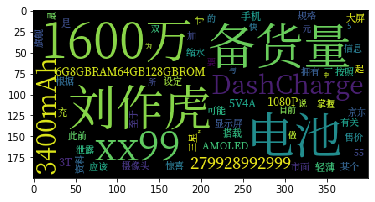

In [67]:
machine_keywords = {w:score for w, score in machine_news_keywrods}
plt.imshow(wc.generate_from_frequencies(machine_keywords))
plt.show()

In [ ]:
shenzhen_social_news = get_keywords_of_document(news_content[4], news_content)

In [70]:
from PIL import Image

In [139]:
alice_mask = np.array(Image.open('./imgs/alice2.png'))

In [205]:
wc_with_mask = wordcloud.WordCloud(
#     background_color='white',
    font_path='./SourceHanSerifSC-Regular.otf',
    contour_width = 3,
    contour_color = 'green',
    mask=alice_mask
)

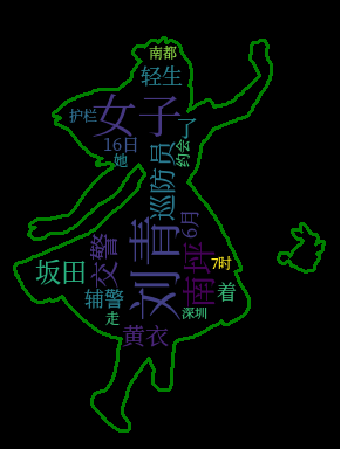

In [207]:
plt.figure(figsize=(8,8), facecolor='k')
plt.axis('off')
plt.imshow(wc_with_mask.generate_from_frequencies({w:s for w,s in shenzhen_social_news[:20]}))
plt.show()

In [404]:
a = np.array([1,2,3])
b = np.array([2,3,4])
a = a.reshape(3,1)
b = b.reshape(3,1)
print(a)
print(b)

[[1]
 [2]
 [3]]
[[2]
 [3]
 [4]]


#### 一般乘法

In [405]:
a * b

array([[ 2],
       [ 6],
       [12]])

#### 矩阵乘法

In [406]:
a @ b.T

array([[ 2,  3,  4],
       [ 4,  6,  8],
       [ 6,  9, 12]])

#### 内积/点积/点乘
> 需要先将待乘两个向量reshape成n维，否则需要最后再np.sum(result)

In [407]:
a = a.reshape(3)
b = b.reshape(3)

In [408]:
np.inner(a,b)

20

In [409]:
np.dot(a,b.T)

20

In [410]:
np.matmul(a,b.T)

20

#### 向量积/外积

In [198]:
c = a.reshape(3)
d = b.reshape(3)
c,d

(array([1, 2, 3]), array([2, 3, 4]))

In [400]:
np.cross(c,d)

array([-1,  2, -1])

### Build Search Engine

In [1]:
print('hello world')

hello world
